In [1]:
import pymc3 as pm

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from stafdb.staf_factory import StafFactory
from testhelper.posterior_plotters import display_parameters, print_umis_diagram


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [10]:
staf_factory = StafFactory('csvs_dr_test_more_data')

external_inflows_more = staf_factory.build_stafs(['1'])
internal_stafs_more = staf_factory.build_stafs([])
external_outflows_more = staf_factory.build_stafs(['2','3'])

reference_material = staf_factory.build_material('1')
reference_timeframe = staf_factory.build_timeframe('1')

staf_factory = StafFactory('csvs_dr_test_less_data')

external_inflows_less = staf_factory.build_stafs(['1'])
internal_stafs_less = staf_factory.build_stafs([])
external_outflows_less = staf_factory.build_stafs(['2','3'])


In [11]:
def main(external_inflows, internal_stafs, external_outflows, ref_material, ref_timeframe):
    umis_diagram = UmisDiagram(
        external_inflows,
        internal_stafs,
        external_outflows)
      
    res_inflows = umis_diagram.get_external_inflows()
    res_dict = umis_diagram.get_process_stafs_dict()
    res_outflows = umis_diagram.get_external_outflows()
    
    math_model = UmisMathModel(
        res_inflows,
        res_dict,
        res_outflows,
        ref_material,
        ref_timeframe)
    
    sample_size = 3000

    with math_model.pm_model:
        trace = pm.sample(sample_size, init='advi')

    map_estimate = pm.find_MAP(model=math_model.pm_model)
    
    return trace, map_estimate, math_model

In [12]:
trace_more, estimate_more, model_more = main(external_inflows_more, internal_stafs_more, external_outflows_more, reference_material, reference_timeframe)
trace_less, estimate_less, model_less = main(external_inflows_less, internal_stafs_less, external_outflows_less, reference_material, reference_timeframe)

/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
  0%|          | 0/200000 [00:00<?, ?it/s]/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-pa

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Staf_1_2-2_1, P_2_1]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:23<00:00, 294.17draws/s]
/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/li

Estimates of: External Inflows

Input Flow: Flow1: 100.00008444814534


Estimates of: Internal Stafs



Estimates of: External Outflows

Output Flow: Stock1: 70.00007205619227
TC: Stock1: 0.700000129424796
Output Flow: Flow2: 30.000012391953085
TC: Flow2: 0.2999998705752041




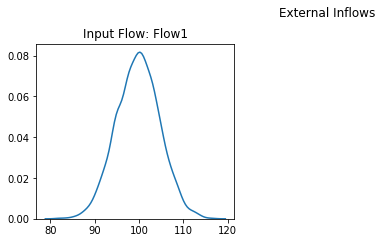

<Figure size 648x0 with 0 Axes>

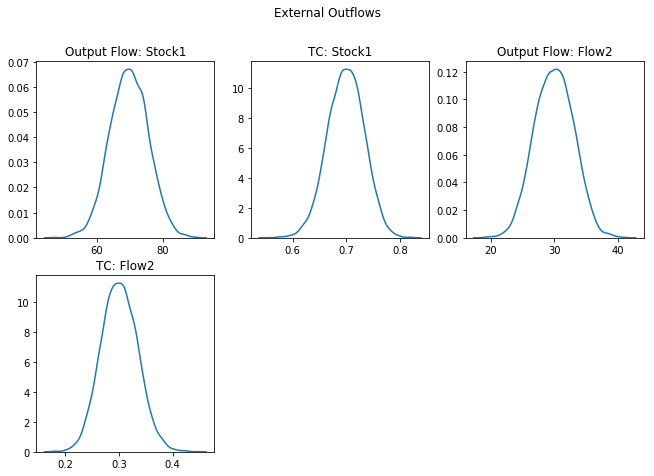

In [14]:

display_parameters(external_inflows_more, internal_stafs_more, external_outflows_more, trace_more, estimate_more, model_more)

Estimates of: External Inflows

Input Flow: Flow1: 100.00000980714704


Estimates of: Internal Stafs



Estimates of: External Outflows

Output Flow: Stock1: 70.00028834784172
TC: Stock1: 0.7000028148281119
Output Flow: Flow2: 29.999721459305317
TC: Flow2: 0.2999971851718881




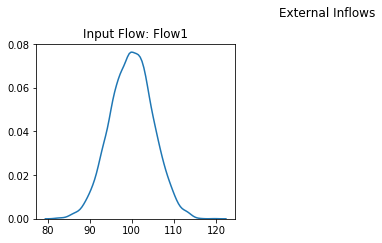

<Figure size 648x0 with 0 Axes>

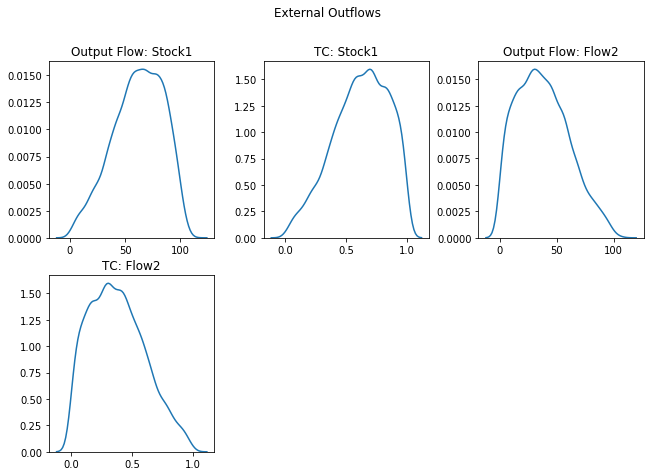

In [15]:

display_parameters(external_inflows_less, internal_stafs_less, external_outflows_less, trace_less, estimate_less, model_less)

In [ ]:
import numpy as np


In [ ]:
stock_trace = trace[math_model.STAF_VAR_NAME]

In [ ]:
print(np.mean(stock_trace[:, 0, 2]))
print(np.std(stock_trace[:, 0, 2]))

In [ ]:
pm.summary(trace)